In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from textwrap import wrap
import ast
import itertools
import collections
import seaborn as sns

### Simple EDA

In [2]:
df = pd.read_csv("../india/india_preprocessed_57_76k.csv")

In [3]:
df

,Unnamed: 0,Text,new_text,languages,translated,new_languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,57000,kalau aku jadi anti vaccine ni salahkan keraja...,kalau aku jadi anti vaccine ni salahkan keraja...,MALAY,"If I become anti -vaccine, blame the Malaysian...",ENGLISH,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...","['become', 'anti', 'vaccine', 'blame', 'malays...","['become', 'anti', 'malaysian', 'government', ...","['government', 'vaccine']"
1,57001,salary is anti dream vaccine,salary is anti dream vaccine,Unknown,salary is anti dream vaccine,Unknown,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...","['salary', 'anti', 'dream', 'vaccine']","['salary', 'dream', 'vaccine']","['salary', 'dream', 'vaccine']"
2,57002,one has wait 21 days after 2nd dose get test d...,one has wait 21 days after 2nd dose get test d...,ENGLISH,one has wait 21 days after 2nd dose get test d...,ENGLISH,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...","['one', 'wait', 'twentynine', 'day', 'dose', '...","['wait', 'twentynine', 'day', 'dose', 'test', ...","['twentynine', 'day', 'test', 'vaccine', 'syri..."
3,57003,"""no vax passports"": anti-vaccine protesters ga...","""no vax passports"": anti-vaccine protesters ga...",ENGLISH,"""no vax passports"": anti-vaccine protesters ga...",ENGLISH,"[('no', 'DT'), ('van', 'NN'), ('passports', 'V...","['van', 'passports', 'anti', 'vaccine', 'prote...","['vaccine', 'protester', 'gather', 'broadway',...","['vaccine', 'protester']"
4,57004,anti-vaccine protests held santa fe から,anti-vaccine protests held santa fe から,Unknown,anti-vaccine protests held santa fe から,Unknown,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...","['anti', 'vaccine', 'protest', 'hold', 'santa'...","['anti', 'protest', 'hold']",['protest']
...,...,...,...,...,...,...,...,...,...,...
18995,75995,i'm done first dose🤘🏻 #vaccinated,i'm done first dosesign_of_the_hornslight_skin...,ENGLISH,I am done first dosesign_of_the_hornslight_ski...,ENGLISH,"[('i', 'NN'), ('am', 'VBP'), ('done', 'VBN'), ...","['do', 'first', 'vaccinate']","['do', 'first', 'vaccinate']",[]
18996,75996,yes i guess. cuz despite we are fully vaccinat...,yes i guess. cuz despite we are fully vaccinat...,ENGLISH,yes i guess. cuz despite we are fully vaccinat...,ENGLISH,"[('yes', 'NNS'), ('i', 'VBP'), ('guess', 'NN')...","['yes', 'guess', 'despite', 'fully', 'vaccinat...","['guess', 'fully', 'vaccinate', 'carrier', 'an...",['carrier']
18997,75997,vaccinated ❣️,vaccinated heart_exclamation️,Unknown,"uk 50% vaccinated..hk 23%...haha...again, utte...",Unknown,"[('uk', 'JJ'), ('fifty', 'NN'), ('vaccinated',...","['fifty', 'vaccinated', 'haha', 'utter', 'poli...","['vaccinated', 'politic']",['politic']
18998,75998,alhamdulilah wan vaccinated his 1st dose.syuku...,alhamdulilah wan vaccinated his 1st dose.syuku...,ENGLISH,alhamdulilah wan vaccinated his 1st dose.syuku...,ENGLISH,"[('alhamdulilah', 'NN'), ('wan', 'NN'), ('vacc...","['alhamdulilah', 'wan', 'vaccinate', 'est', 'd...","['vaccinate', 'dose', 'today']",['today']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         19000 non-null  int64 
 1   Text                               19000 non-null  object
 2   new_text                           19000 non-null  object
 3   languages                          19000 non-null  object
 4   translated                         19000 non-null  object
 5   new_languages                      19000 non-null  object
 6   pos_tagged_words                   19000 non-null  object
 7   words_processed_all                19000 non-null  object
 8   words_processed_noun_adj_verb_adv  19000 non-null  object
 9   words_processed_noun               19000 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.4+ MB


In [5]:
df[df.duplicated()==True]

,Unnamed: 0,Text,new_text,languages,translated,new_languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun


In [6]:
df.describe()

,Unnamed: 0
count,19000.000000
mean,66499.500000
std,5484.971893
min,57000.000000
25%,61749.750000
50%,66499.500000
75%,71249.250000
max,75999.000000


In [7]:
df.dtypes

Unnamed: 0                            int64
Text                                 object
new_text                             object
languages                            object
translated                           object
new_languages                        object
pos_tagged_words                     object
words_processed_all                  object
words_processed_noun_adj_verb_adv    object
words_processed_noun                 object
dtype: object

In [8]:
df.head()

,Unnamed: 0,Text,new_text,languages,translated,new_languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,57000,kalau aku jadi anti vaccine ni salahkan keraja...,kalau aku jadi anti vaccine ni salahkan keraja...,MALAY,"If I become anti -vaccine, blame the Malaysian...",ENGLISH,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...","['become', 'anti', 'vaccine', 'blame', 'malays...","['become', 'anti', 'malaysian', 'government', ...","['government', 'vaccine']"
1,57001,salary is anti dream vaccine,salary is anti dream vaccine,Unknown,salary is anti dream vaccine,Unknown,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...","['salary', 'anti', 'dream', 'vaccine']","['salary', 'dream', 'vaccine']","['salary', 'dream', 'vaccine']"
2,57002,one has wait 21 days after 2nd dose get test d...,one has wait 21 days after 2nd dose get test d...,ENGLISH,one has wait 21 days after 2nd dose get test d...,ENGLISH,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...","['one', 'wait', 'twentynine', 'day', 'dose', '...","['wait', 'twentynine', 'day', 'dose', 'test', ...","['twentynine', 'day', 'test', 'vaccine', 'syri..."
3,57003,"""no vax passports"": anti-vaccine protesters ga...","""no vax passports"": anti-vaccine protesters ga...",ENGLISH,"""no vax passports"": anti-vaccine protesters ga...",ENGLISH,"[('no', 'DT'), ('van', 'NN'), ('passports', 'V...","['van', 'passports', 'anti', 'vaccine', 'prote...","['vaccine', 'protester', 'gather', 'broadway',...","['vaccine', 'protester']"
4,57004,anti-vaccine protests held santa fe から,anti-vaccine protests held santa fe から,Unknown,anti-vaccine protests held santa fe から,Unknown,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...","['anti', 'vaccine', 'protest', 'hold', 'santa'...","['anti', 'protest', 'hold']",['protest']


### Sentence Length Distribution

In [9]:
sns.set(rc = {'figure.figsize':(6,6)})

Max length: 289, Min length: 1, Average Length :  136.15752631578948


<AxesSubplot:>

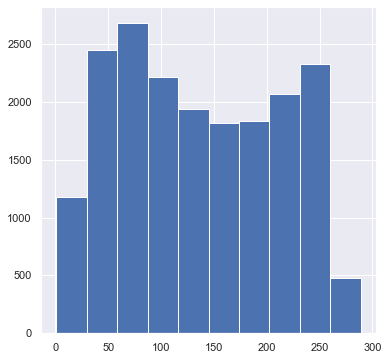

In [10]:
#sentence length distribution
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Text'].str.len()),min(df['Text'].str.len()),df['Text'].str.len().mean()))
df['Text'].str.len().hist()

### Word Count

In [11]:
#Review word count: Just to get a simple sensing of the word count in the reviews
word_count = []
for each in df["pos_tagged_words"]:
    words_list = each.split(" ")
    word_count.append(len(words_list))
df["word_count"] = word_count

In [12]:
df.head()

,Unnamed: 0,Text,new_text,languages,translated,new_languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count
0,57000,kalau aku jadi anti vaccine ni salahkan keraja...,kalau aku jadi anti vaccine ni salahkan keraja...,MALAY,"If I become anti -vaccine, blame the Malaysian...",ENGLISH,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...","['become', 'anti', 'vaccine', 'blame', 'malays...","['become', 'anti', 'malaysian', 'government', ...","['government', 'vaccine']",52
1,57001,salary is anti dream vaccine,salary is anti dream vaccine,Unknown,salary is anti dream vaccine,Unknown,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...","['salary', 'anti', 'dream', 'vaccine']","['salary', 'dream', 'vaccine']","['salary', 'dream', 'vaccine']",10
2,57002,one has wait 21 days after 2nd dose get test d...,one has wait 21 days after 2nd dose get test d...,ENGLISH,one has wait 21 days after 2nd dose get test d...,ENGLISH,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...","['one', 'wait', 'twentynine', 'day', 'dose', '...","['wait', 'twentynine', 'day', 'dose', 'test', ...","['twentynine', 'day', 'test', 'vaccine', 'syri...",82
3,57003,"""no vax passports"": anti-vaccine protesters ga...","""no vax passports"": anti-vaccine protesters ga...",ENGLISH,"""no vax passports"": anti-vaccine protesters ga...",ENGLISH,"[('no', 'DT'), ('van', 'NN'), ('passports', 'V...","['van', 'passports', 'anti', 'vaccine', 'prote...","['vaccine', 'protester', 'gather', 'broadway',...","['vaccine', 'protester']",24
4,57004,anti-vaccine protests held santa fe から,anti-vaccine protests held santa fe から,Unknown,anti-vaccine protests held santa fe から,Unknown,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...","['anti', 'vaccine', 'protest', 'hold', 'santa'...","['anti', 'protest', 'hold']",['protest'],14


In [13]:
df["word_count"].describe()

count    19000.000000
mean        43.822316
std         25.718666
min          1.000000
25%         22.000000
50%         40.000000
75%         64.000000
max        162.000000
Name: word_count, dtype: float64

<AxesSubplot:>

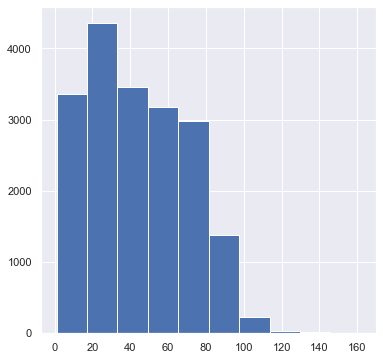

In [14]:
#word length distribution
df['word_count'].hist()

## VADER Sentiment

In [15]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harpreet/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
#Test
sid.polarity_scores("This is an excellent car with great mileage")

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8316}

In [17]:
words_processed_all = df['words_processed_all'].to_list()
print(words_processed_all[0])
words_processed_all[0][0]

['become', 'anti', 'vaccine', 'blame', 'malaysian', 'government', 'tire', 'wait', 'vaccine', 'wait', 'brother', 'jamil', 'campos', 'keeper']


'['

In [18]:
import ast
new_list = []
for str_list in words_processed_all:
    a_list = ast.literal_eval(str_list)
    new_list.append(a_list)

In [19]:
len(new_list)

19000

In [20]:
new_list[0]

['become',
 'anti',
 'vaccine',
 'blame',
 'malaysian',
 'government',
 'tire',
 'wait',
 'vaccine',
 'wait',
 'brother',
 'jamil',
 'campos',
 'keeper']

In [21]:
new_list[0][0]

'become'

In [22]:
all_words_df = df[['Text', 'pos_tagged_words', 'words_processed_all', 'new_languages']].copy()

In [23]:
all_words_df

,Text,pos_tagged_words,words_processed_all,new_languages
0,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...","['become', 'anti', 'vaccine', 'blame', 'malays...",ENGLISH
1,salary is anti dream vaccine,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...","['salary', 'anti', 'dream', 'vaccine']",Unknown
2,one has wait 21 days after 2nd dose get test d...,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...","['one', 'wait', 'twentynine', 'day', 'dose', '...",ENGLISH
3,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...","['van', 'passports', 'anti', 'vaccine', 'prote...",ENGLISH
4,anti-vaccine protests held santa fe から,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...","['anti', 'vaccine', 'protest', 'hold', 'santa'...",Unknown
...,...,...,...,...
18995,i'm done first dose🤘🏻 #vaccinated,"[('i', 'NN'), ('am', 'VBP'), ('done', 'VBN'), ...","['do', 'first', 'vaccinate']",ENGLISH
18996,yes i guess. cuz despite we are fully vaccinat...,"[('yes', 'NNS'), ('i', 'VBP'), ('guess', 'NN')...","['yes', 'guess', 'despite', 'fully', 'vaccinat...",ENGLISH
18997,vaccinated ❣️,"[('uk', 'JJ'), ('fifty', 'NN'), ('vaccinated',...","['fifty', 'vaccinated', 'haha', 'utter', 'poli...",Unknown
18998,alhamdulilah wan vaccinated his 1st dose.syuku...,"[('alhamdulilah', 'NN'), ('wan', 'NN'), ('vacc...","['alhamdulilah', 'wan', 'vaccinate', 'est', 'd...",ENGLISH


In [24]:
all_words_df['words_list'] = new_list

In [25]:
all_words_df.drop(columns = "words_processed_all", inplace = True)
all_words_df

,Text,pos_tagged_words,new_languages,words_list
0,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...",ENGLISH,"[become, anti, vaccine, blame, malaysian, gove..."
1,salary is anti dream vaccine,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...",Unknown,"[salary, anti, dream, vaccine]"
2,one has wait 21 days after 2nd dose get test d...,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...",ENGLISH,"[one, wait, twentynine, day, dose, get, test, ..."
3,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...",ENGLISH,"[van, passports, anti, vaccine, protester, gat..."
4,anti-vaccine protests held santa fe から,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...",Unknown,"[anti, vaccine, protest, hold, santa, fe]"
...,...,...,...,...
18995,i'm done first dose🤘🏻 #vaccinated,"[('i', 'NN'), ('am', 'VBP'), ('done', 'VBN'), ...",ENGLISH,"[do, first, vaccinate]"
18996,yes i guess. cuz despite we are fully vaccinat...,"[('yes', 'NNS'), ('i', 'VBP'), ('guess', 'NN')...",ENGLISH,"[yes, guess, despite, fully, vaccinate, carrie..."
18997,vaccinated ❣️,"[('uk', 'JJ'), ('fifty', 'NN'), ('vaccinated',...",Unknown,"[fifty, vaccinated, haha, utter, politic, china]"
18998,alhamdulilah wan vaccinated his 1st dose.syuku...,"[('alhamdulilah', 'NN'), ('wan', 'NN'), ('vacc...",ENGLISH,"[alhamdulilah, wan, vaccinate, est, dose, wan,..."


In [26]:
all_words_df['words_list'][0]

['become',
 'anti',
 'vaccine',
 'blame',
 'malaysian',
 'government',
 'tire',
 'wait',
 'vaccine',
 'wait',
 'brother',
 'jamil',
 'campos',
 'keeper']

In [27]:
' '.join(all_words_df['words_list'][0])

'become anti vaccine blame malaysian government tire wait vaccine wait brother jamil campos keeper'

In [28]:
new_col = []
all_lists = all_words_df['words_list']
for a_list in all_lists:
    new_text = ' '.join(a_list)
    new_col.append(new_text)

In [29]:
new_col

['become anti vaccine blame malaysian government tire wait vaccine wait brother jamil campos keeper',
 'salary anti dream vaccine',
 'one wait twentynine day dose get test do low zero anti_bodies find go another vaccine syringe never take vaccine immune body happen',
 'van passports anti vaccine protester gather springsteen broadway reopen',
 'anti vaccine protest hold santa fe',
 'life add anti vaccine block list account one problem deal debate illogical two real information source front click button not responsible mentality important thing summarize',
 'booster many anti viral vaccine',
 'govt india act urbannaxal antivaccine idiot plus invoke nationaldisastermanagementact goondasact',
 'please not bother persuade man take vaccine thing happen prashant bushman likely hood appear unlikely one anti national less spread fake news asset nation',
 'young people likely die vaccination not take vaccine prashant bushman clarifie not anti vaccine',
 'good sir also make_sure person fraternity

In [30]:
all_words_df['new_text'] = new_col
all_words_df

,Text,pos_tagged_words,new_languages,words_list,new_text
0,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...",ENGLISH,"[become, anti, vaccine, blame, malaysian, gove...",become anti vaccine blame malaysian government...
1,salary is anti dream vaccine,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...",Unknown,"[salary, anti, dream, vaccine]",salary anti dream vaccine
2,one has wait 21 days after 2nd dose get test d...,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...",ENGLISH,"[one, wait, twentynine, day, dose, get, test, ...",one wait twentynine day dose get test do low z...
3,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...",ENGLISH,"[van, passports, anti, vaccine, protester, gat...",van passports anti vaccine protester gather sp...
4,anti-vaccine protests held santa fe から,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...",Unknown,"[anti, vaccine, protest, hold, santa, fe]",anti vaccine protest hold santa fe
...,...,...,...,...,...
18995,i'm done first dose🤘🏻 #vaccinated,"[('i', 'NN'), ('am', 'VBP'), ('done', 'VBN'), ...",ENGLISH,"[do, first, vaccinate]",do first vaccinate
18996,yes i guess. cuz despite we are fully vaccinat...,"[('yes', 'NNS'), ('i', 'VBP'), ('guess', 'NN')...",ENGLISH,"[yes, guess, despite, fully, vaccinate, carrie...",yes guess despite fully vaccinate carrier anyway
18997,vaccinated ❣️,"[('uk', 'JJ'), ('fifty', 'NN'), ('vaccinated',...",Unknown,"[fifty, vaccinated, haha, utter, politic, china]",fifty vaccinated haha utter politic china
18998,alhamdulilah wan vaccinated his 1st dose.syuku...,"[('alhamdulilah', 'NN'), ('wan', 'NN'), ('vacc...",ENGLISH,"[alhamdulilah, wan, vaccinate, est, dose, wan,...",alhamdulilah wan vaccinate est dose wan excite...


In [31]:
all_words_df['scores'] = df['new_text'].apply(lambda tweet: sid.polarity_scores(tweet))
all_words_df

,Text,pos_tagged_words,new_languages,words_list,new_text,scores
0,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...",ENGLISH,"[become, anti, vaccine, blame, malaysian, gove...",become anti vaccine blame malaysian government...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp..."
1,salary is anti dream vaccine,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...",Unknown,"[salary, anti, dream, vaccine]",salary anti dream vaccine,"{'neg': 0.315, 'neu': 0.411, 'pos': 0.274, 'co..."
2,one has wait 21 days after 2nd dose get test d...,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...",ENGLISH,"[one, wait, twentynine, day, dose, get, test, ...",one wait twentynine day dose get test do low z...,"{'neg': 0.103, 'neu': 0.845, 'pos': 0.052, 'co..."
3,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...",ENGLISH,"[van, passports, anti, vaccine, protester, gat...",van passports anti vaccine protester gather sp...,"{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'comp..."
4,anti-vaccine protests held santa fe から,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...",Unknown,"[anti, vaccine, protest, hold, santa, fe]",anti vaccine protest hold santa fe,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp..."
...,...,...,...,...,...,...
18995,i'm done first dose🤘🏻 #vaccinated,"[('i', 'NN'), ('am', 'VBP'), ('done', 'VBN'), ...",ENGLISH,"[do, first, vaccinate]",do first vaccinate,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
18996,yes i guess. cuz despite we are fully vaccinat...,"[('yes', 'NNS'), ('i', 'VBP'), ('guess', 'NN')...",ENGLISH,"[yes, guess, despite, fully, vaccinate, carrie...",yes guess despite fully vaccinate carrier anyway,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp..."
18997,vaccinated ❣️,"[('uk', 'JJ'), ('fifty', 'NN'), ('vaccinated',...",Unknown,"[fifty, vaccinated, haha, utter, politic, china]",fifty vaccinated haha utter politic china,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
18998,alhamdulilah wan vaccinated his 1st dose.syuku...,"[('alhamdulilah', 'NN'), ('wan', 'NN'), ('vacc...",ENGLISH,"[alhamdulilah, wan, vaccinate, est, dose, wan,...",alhamdulilah wan vaccinate est dose wan excite...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp..."


In [32]:
all_words_df['compound']  = all_words_df['scores'].apply(lambda score_dict: score_dict['compound'])
all_words_df

,Text,pos_tagged_words,new_languages,words_list,new_text,scores,compound
0,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...",ENGLISH,"[become, anti, vaccine, blame, malaysian, gove...",become anti vaccine blame malaysian government...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.3182
1,salary is anti dream vaccine,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...",Unknown,"[salary, anti, dream, vaccine]",salary anti dream vaccine,"{'neg': 0.315, 'neu': 0.411, 'pos': 0.274, 'co...",-0.0772
2,one has wait 21 days after 2nd dose get test d...,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...",ENGLISH,"[one, wait, twentynine, day, dose, get, test, ...",one wait twentynine day dose get test do low z...,"{'neg': 0.103, 'neu': 0.845, 'pos': 0.052, 'co...",-0.2960
3,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...",ENGLISH,"[van, passports, anti, vaccine, protester, gat...",van passports anti vaccine protester gather sp...,"{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'comp...",-0.4767
4,anti-vaccine protests held santa fe から,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...",Unknown,"[anti, vaccine, protest, hold, santa, fe]",anti vaccine protest hold santa fe,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263
...,...,...,...,...,...,...,...
18995,i'm done first dose🤘🏻 #vaccinated,"[('i', 'NN'), ('am', 'VBP'), ('done', 'VBN'), ...",ENGLISH,"[do, first, vaccinate]",do first vaccinate,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
18996,yes i guess. cuz despite we are fully vaccinat...,"[('yes', 'NNS'), ('i', 'VBP'), ('guess', 'NN')...",ENGLISH,"[yes, guess, despite, fully, vaccinate, carrie...",yes guess despite fully vaccinate carrier anyway,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.2144
18997,vaccinated ❣️,"[('uk', 'JJ'), ('fifty', 'NN'), ('vaccinated',...",Unknown,"[fifty, vaccinated, haha, utter, politic, china]",fifty vaccinated haha utter politic china,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
18998,alhamdulilah wan vaccinated his 1st dose.syuku...,"[('alhamdulilah', 'NN'), ('wan', 'NN'), ('vacc...",ENGLISH,"[alhamdulilah, wan, vaccinate, est, dose, wan,...",alhamdulilah wan vaccinate est dose wan excite...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.4795


In [33]:
all_words_df["compound"].value_counts()

 0.0000    7096
 0.4404     325
 0.3182     259
 0.3612     259
-0.2960     252
           ... 
 0.6860       1
 0.0027       1
-0.5409       1
-0.2783       1
-0.4595       1
Name: compound, Length: 2414, dtype: int64

In [34]:
sentiment_vader = []
for each in all_words_df["compound"]:
    if each == 0:
        sentiment_vader.append("neutral")
    elif each > 0:
        sentiment_vader.append("positive")
    else:
        sentiment_vader.append("negative")

In [35]:
all_words_df["sentiment_vader"] = sentiment_vader

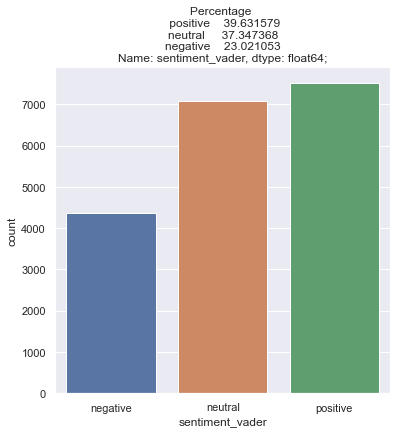

In [36]:
sns.countplot(x="sentiment_vader", data=all_words_df)
normalise_count = all_words_df['sentiment_vader'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

In [37]:
all_words_df

,Text,pos_tagged_words,new_languages,words_list,new_text,scores,compound,sentiment_vader
0,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...",ENGLISH,"[become, anti, vaccine, blame, malaysian, gove...",become anti vaccine blame malaysian government...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.3182,negative
1,salary is anti dream vaccine,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...",Unknown,"[salary, anti, dream, vaccine]",salary anti dream vaccine,"{'neg': 0.315, 'neu': 0.411, 'pos': 0.274, 'co...",-0.0772,negative
2,one has wait 21 days after 2nd dose get test d...,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...",ENGLISH,"[one, wait, twentynine, day, dose, get, test, ...",one wait twentynine day dose get test do low z...,"{'neg': 0.103, 'neu': 0.845, 'pos': 0.052, 'co...",-0.2960,negative
3,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...",ENGLISH,"[van, passports, anti, vaccine, protester, gat...",van passports anti vaccine protester gather sp...,"{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'comp...",-0.4767,negative
4,anti-vaccine protests held santa fe から,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...",Unknown,"[anti, vaccine, protest, hold, santa, fe]",anti vaccine protest hold santa fe,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263,negative
...,...,...,...,...,...,...,...,...
18995,i'm done first dose🤘🏻 #vaccinated,"[('i', 'NN'), ('am', 'VBP'), ('done', 'VBN'), ...",ENGLISH,"[do, first, vaccinate]",do first vaccinate,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
18996,yes i guess. cuz despite we are fully vaccinat...,"[('yes', 'NNS'), ('i', 'VBP'), ('guess', 'NN')...",ENGLISH,"[yes, guess, despite, fully, vaccinate, carrie...",yes guess despite fully vaccinate carrier anyway,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.2144,positive
18997,vaccinated ❣️,"[('uk', 'JJ'), ('fifty', 'NN'), ('vaccinated',...",Unknown,"[fifty, vaccinated, haha, utter, politic, china]",fifty vaccinated haha utter politic china,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
18998,alhamdulilah wan vaccinated his 1st dose.syuku...,"[('alhamdulilah', 'NN'), ('wan', 'NN'), ('vacc...",ENGLISH,"[alhamdulilah, wan, vaccinate, est, dose, wan,...",alhamdulilah wan vaccinate est dose wan excite...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.4795,positive


In [38]:
pos = all_words_df[all_words_df["sentiment_vader"] == "positive"]
neg = all_words_df[all_words_df["sentiment_vader"] == "negative"]
neu = all_words_df[all_words_df["sentiment_vader"] == "neutral"]

In [39]:
for each in pos.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: 78% were unvaccinated out 1706 cases existed friday, 94% unvaccinated cases that are intensive care. #bahrain #commit4bahrain #vaccinateandstaysafe #vaccinated #covid19 #coronavirus #بحرين #vaccinate
 
Tweet: i don’t like see anyone get sick, but i wish everyone would get vaccinated.
 
Tweet: two doses astrazeneca vaccine were 60% effective against b.1.617.2 variant 66% effective against b.1.1.7, study said.—&gt;beggars can’t choose. if we were wait pfizer, our turn might be next year 🥲🥲🥲
 


In [40]:
for each in neu.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: #vaccination india started jan 16 we are 8th month 8% india got vaccinated, 1% per month we need 100 months vaccinate india, validity vaccine is max yr, we can never be vaccinated 100% ever. 10th wave is also not far
 
Tweet: building immunity against #covid by getting first dose #astrazeneca #vaccinated
 
Tweet: australia today announced reopening boarders vaccinated tourists other visa holders 21 february.
 


In [41]:
for each in neg.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: make sure all teachers n students got vaxx first. all kerani, mak cik kantin n also cleaners vaccinated. kau parlimen pon xnak bkk, ni sibok suh budak x vaxx p sekolah. enough with all this stupidity.
 
Tweet: there’s much talk about “amber list scrapped” but it’s simply not true amber list is now rebranded as: “unvaccinated, or fully vaccinated country that is not uk recognised-country list such as uae, india, etc ” 10 day home quarantine/and day 2 + 8 tests apply ⚠️
 
Tweet: fully vaccinated getting covid &amp; passing it double jabbed people are catching covid passing it those they live with, warn experts who have studied uk cases individuals who have had two vaccine doses can be just as infectious as w/ no vaccines
 


In [42]:
all_words_df

,Text,pos_tagged_words,new_languages,words_list,new_text,scores,compound,sentiment_vader
0,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...",ENGLISH,"[become, anti, vaccine, blame, malaysian, gove...",become anti vaccine blame malaysian government...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.3182,negative
1,salary is anti dream vaccine,"[('salary', 'NN'), ('is', 'VBZ'), ('anti', 'JJ...",Unknown,"[salary, anti, dream, vaccine]",salary anti dream vaccine,"{'neg': 0.315, 'neu': 0.411, 'pos': 0.274, 'co...",-0.0772,negative
2,one has wait 21 days after 2nd dose get test d...,"[('one', 'CD'), ('has', 'VBZ'), ('wait', 'VBN'...",ENGLISH,"[one, wait, twentynine, day, dose, get, test, ...",one wait twentynine day dose get test do low z...,"{'neg': 0.103, 'neu': 0.845, 'pos': 0.052, 'co...",-0.2960,negative
3,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...",ENGLISH,"[van, passports, anti, vaccine, protester, gat...",van passports anti vaccine protester gather sp...,"{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'comp...",-0.4767,negative
4,anti-vaccine protests held santa fe から,"[('anti', 'JJ'), ('vaccine', 'NN'), ('protests...",Unknown,"[anti, vaccine, protest, hold, santa, fe]",anti vaccine protest hold santa fe,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263,negative
...,...,...,...,...,...,...,...,...
18995,i'm done first dose🤘🏻 #vaccinated,"[('i', 'NN'), ('am', 'VBP'), ('done', 'VBN'), ...",ENGLISH,"[do, first, vaccinate]",do first vaccinate,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
18996,yes i guess. cuz despite we are fully vaccinat...,"[('yes', 'NNS'), ('i', 'VBP'), ('guess', 'NN')...",ENGLISH,"[yes, guess, despite, fully, vaccinate, carrie...",yes guess despite fully vaccinate carrier anyway,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.2144,positive
18997,vaccinated ❣️,"[('uk', 'JJ'), ('fifty', 'NN'), ('vaccinated',...",Unknown,"[fifty, vaccinated, haha, utter, politic, china]",fifty vaccinated haha utter politic china,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
18998,alhamdulilah wan vaccinated his 1st dose.syuku...,"[('alhamdulilah', 'NN'), ('wan', 'NN'), ('vacc...",ENGLISH,"[alhamdulilah, wan, vaccinate, est, dose, wan,...",alhamdulilah wan vaccinate est dose wan excite...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.4795,positive


In [43]:
all_words_df.to_csv("labelled_india_57_76k.csv", index = False)